# CLUSTERIZAÇÃO VARIÁVEIS CRUAS:

CNAE_FISCAL_SECUNDÁRIA - MUNICÍPIO - ANO

In [1]:
import pandas as pd
df = pd.read_csv('df_final_cs.csv')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_SECUNDÁRIA,MUNICÍPIO
0,2023,4645101,7885
1,2023,4691500,1569
2,2023,4641902,1219
3,2023,4635401,1219
4,2023,4623109,1219
...,...,...,...
85176660,1903,9499500,921
85176661,1901,9499500,8927
85176662,1901,9493600,8927
85176663,1901,9609299,6645


In [3]:
dados_cluster = df[['CNAE_FISCAL_SECUNDÁRIA', 'MUNICÍPIO', 'DATA_DE_INÍCIO_ATIVIDADE']]
dados_cluster

,CNAE_FISCAL_SECUNDÁRIA,MUNICÍPIO,DATA_DE_INÍCIO_ATIVIDADE
0,4645101,7885,2023
1,4691500,1569,2023
2,4641902,1219,2023
3,4635401,1219,2023
4,4623109,1219,2023
...,...,...,...
85176660,9499500,921,1903
85176661,9499500,8927,1901
85176662,9493600,8927,1901
85176663,9609299,6645,1901


In [4]:
# Realize a amostragem aleatória simples com 0,001% dos dados
dados_cluster = dados_cluster.sample(frac=0.001, random_state=42)
dados_cluster

,CNAE_FISCAL_SECUNDÁRIA,MUNICÍPIO,DATA_DE_INÍCIO_ATIVIDADE
13371777,4783102,9701,2021
17844177,7420004,5403,2021
16910876,8599699,6377,2021
49398932,3299099,2913,2015
23025343,7911200,3215,2020
...,...,...,...
18220220,1422300,921,2021
14839787,8599699,9701,2021
55222796,5611203,6861,2013
30827534,8650099,2531,2019


In [5]:
# transformações necessárias para aplicação do algoritmo
# Converter as colunas "MUNICÍPIO" e "CNAE_FISCAL_PRINCIPAL" em string
dados_cluster["MUNICÍPIO"] = dados_cluster["MUNICÍPIO"].astype(str)
dados_cluster["CNAE_FISCAL_SECUNDÁRIA"] = dados_cluster["CNAE_FISCAL_SECUNDÁRIA"].astype(str)

# Agrupar o DataFrame pelos campos desejados
grupo = dados_cluster.groupby(["DATA_DE_INÍCIO_ATIVIDADE", "MUNICÍPIO", "CNAE_FISCAL_SECUNDÁRIA"]).size().reset_index(name="Contagem")

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_cluster_scaled = scaler.fit_transform(grupo)

pca = PCA(n_components=2)  # k é o número de componentes principais desejados
X = pca.fit_transform(dados_cluster_scaled)

componentes_principais = pca.components_
variancia_explicada = pca.explained_variance_ratio_


Número de clusters encontrados: 10


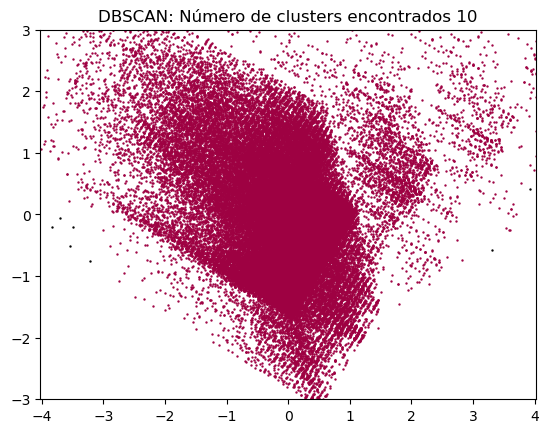

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Aplicando o DBSCAN
eps = 0.3  # Parâmetro de distância máxima entre os pontos do mesmo cluster
min_samples = 5  # Número mínimo de pontos para formar um cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Obtendo a quantidade de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# Criando um gráfico colorido dos clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Ruído é exibido em preto
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=0.5)

plt.title('DBSCAN: Número de clusters encontrados {}'.format(n_clusters))

# Centralizar o gráfico na origem
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

# ANÁLISE DE RESULTADOS DA CLUSTERIZAÇÃO COM VARIÁVEIS CRUAS: 

CNAE_FISCAL_PRINCIPAL - MUNICÍPIO - ANO

Tendo em vista a utilização de apenas 0,001% dos dados devido às limitações de poder computacional existentes, o gráfico apresentado possui distribuição irregular e concentrada próximo à origem. Os 5 clusters encontrados não apresentaram resultados conclusivos ao formato dos dados. O posicionamento dos dados indica uma curva de crescimento diretamente proporcional.

OK! Coluna ano1 > filtrada por município > ano1 (min por município > menor valor. prim ocorrência cnae. Abertura do cnpj)

OK! Coluna maturidade "ano 37" > filtrar município > ano_da_linha - ano1
        Talvez seja necessário ordenar por ano antes. 



Não supervisionado: Depois disso será possível fazer uma clusterização por maturidade média dos que estão no "ano 37"


Depois disso será possível fazer o ranking

Contagem de quantos cnaes novos por município: filtrar: ano > município > contagem cnaes existentes

    Quanto mais cnaes (maior contagem) mais desenvolvido será o município no ano

Fazer um gráfico com a evolução por ano do ranking de municípios (gráfico móvel do pbi)

Depois disso posso retirar as capitais para verificar quais os municípios do interior são mais desenvolvidos (novo dataset sem capitais somente com os municípios do interior)

GRÁFICO DE BARRAS MÓVEL (RACE BAR CHART)

In [ ]:
# AJUSTANDO A BASE PARA OUTRO FORMATO

# # Usando a função pivot_table para reorganizar o DataFrame
# df_g1 = df.pivot_table(index='ANO', columns='MUNICÍPIO', values='CONTAGEM_CP_MUN', aggfunc='sum', fill_value=0)

# # Resetando o índice para manter "ANO" como uma coluna
# df_g1 = df_g1.reset_index()

# df_g1

# Fazer um gráfico com a evolução por ano do ranking de municípios
# gráfico móvel de barras móvel (PBI)

# criar um gráfico de barras móvel utilizando ANO, MUNICÍPIO e CONTAGEM_CP_ANO_MUN

In [ ]:
# APLICANDO GRÁFICO DE BARRAS MÓVEL (RACE BAR)
# !pip3 install bar_chart_race

In [ ]:
# pip install bar_chart_race

In [ ]:
# import bar_chart_race as bcr

# df_g1 = df_g1.set_index('ANO')
# bcr.bar_chart_race(
#     df=df, 
#     title='CONTAGEM_CP_MUN X ANO', 
#     orientation='h', 
#     sort='desc', 
#     n_bars=10, 
#     steps_per_period=40, 
#     period_length=2000
# )

In [ ]:
#Pegar características dos municípios pra poder comparar com o pib
	#Ex número habitantes x pib
	#Qtd empresas x pib

#Fazer gráfico por município

#Pegar os de maior pib e menor pib pra comparação

#Comparar 2 municípios no gráfico